# Демозаикинг

***

In [14]:
# if not installed
# !pip install colour-demosaicing==0.2.2

In [15]:
# нужно, чтобы cv2 открывал exr изображения
import os
os.environ["OPENCV_IO_ENABLE_OPENEXR"]="1"

In [16]:
from pathlib import Path

import cv2

import colour

from colour_demosaicing import (
    demosaicing_CFA_Bayer_bilinear,
    demosaicing_CFA_Bayer_Malvar2004,
    demosaicing_CFA_Bayer_Menon2007,
    mosaicing_CFA_Bayer)

import matplotlib.pyplot as plt
import numpy as np

In [17]:
LIGHTHOUSE_IMG_PATH = "data/lighthouse.exr"

if not Path(LIGHTHOUSE_IMG_PATH).exists():
    !git clone https://github.com/alexmelekhin/cv_course_2023.git
    !mv cv_course_2023/seminars/seminar_02/data .

In [18]:
rgb_img = cv2.imread(LIGHTHOUSE_IMG_PATH, cv2.IMREAD_UNCHANGED)[:, :, ::-1]
rgb_img = colour.cctf_encoding(rgb_img)
rgb_img.dtype

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\grfmt_exr.cpp:103: error: (-213:The function/feature is not implemented) imgcodecs: OpenEXR codec is disabled. You can enable it via 'OPENCV_IO_ENABLE_OPENEXR' option. Refer for details and cautions here: https://github.com/opencv/opencv/issues/21326 in function 'cv::initOpenEXR'


In [19]:
rgb_img.shape

NameError: name 'rgb_img' is not defined

NameError: name 'rgb_img' is not defined

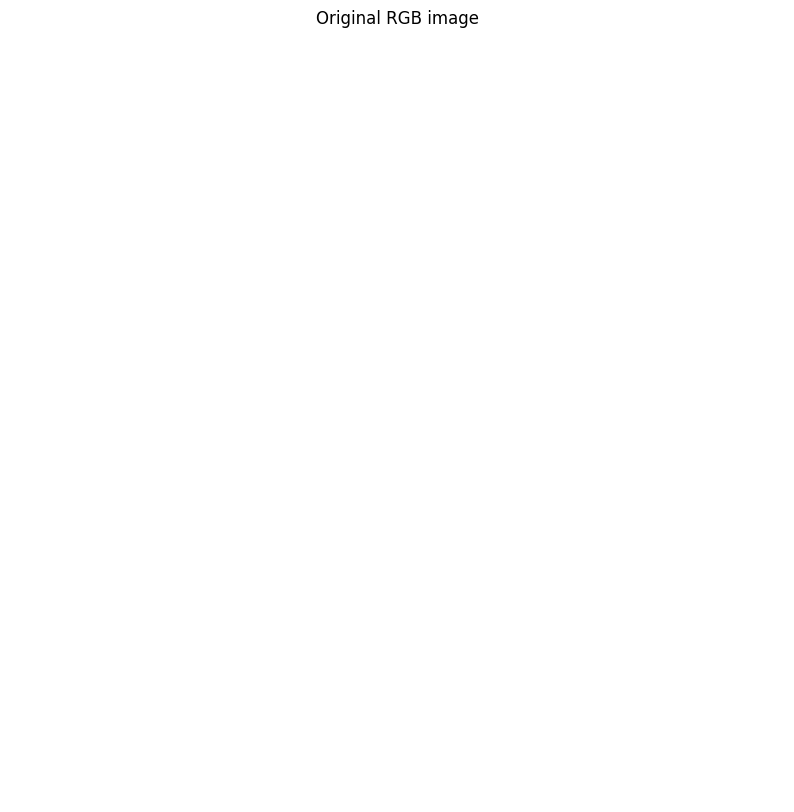

In [20]:
plt.figure(figsize=[10, 10])
plt.axis("off")
plt.title("Original RGB image")
plt.imshow(rgb_img)

In [21]:
mosaiced_image = mosaicing_CFA_Bayer(rgb_img, pattern="RGGB")
mosaiced_image.shape

NameError: name 'rgb_img' is not defined

NameError: name 'mosaiced_image' is not defined

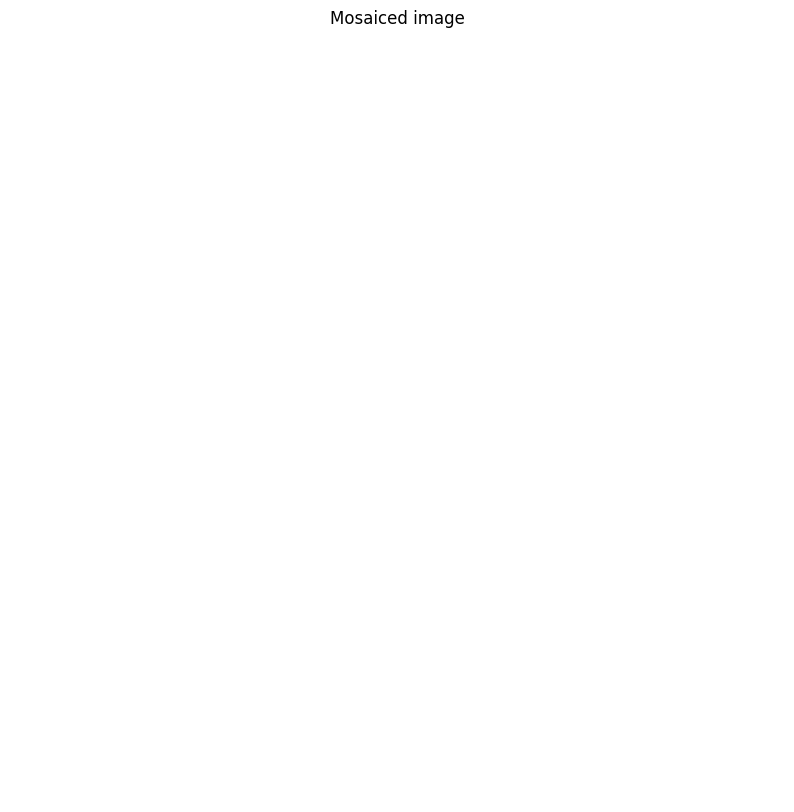

In [22]:
plt.figure(figsize=[10, 10])
plt.axis("off")
plt.title("Mosaiced image")
plt.imshow(mosaiced_image, cmap="gray")

In [23]:
def separate_chanel_rggb(img):
    new_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=img.dtype)
    new_img[0::2, 0::2, 0] = img[0::2, 0::2]  # R
    new_img[0::2, 1::2, 1] = img[0::2, 1::2]  # G1
    new_img[1::2, 0::2, 1] = img[0::2, 1::2]  # G2
    new_img[1::2, 1::2, 2] = img[0::2, 1::2]  # B
    return new_img

NameError: name 'mosaiced_image' is not defined

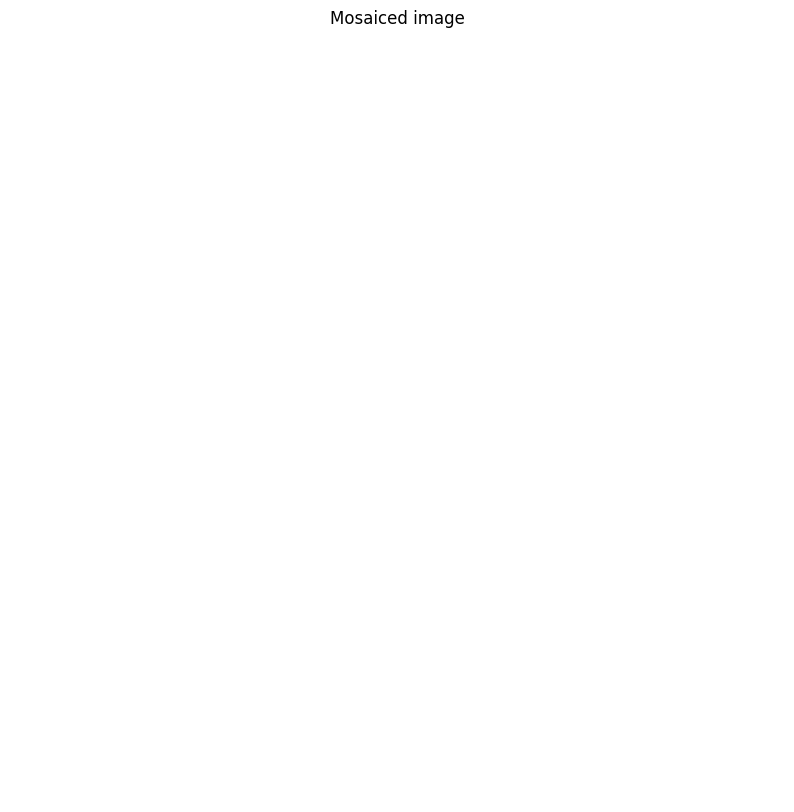

In [24]:
plt.figure(figsize=[10, 10])
plt.axis("off")
plt.title("Mosaiced image")
plt.imshow(separate_chanel_rggb(mosaiced_image))

NameError: name 'mosaiced_image' is not defined

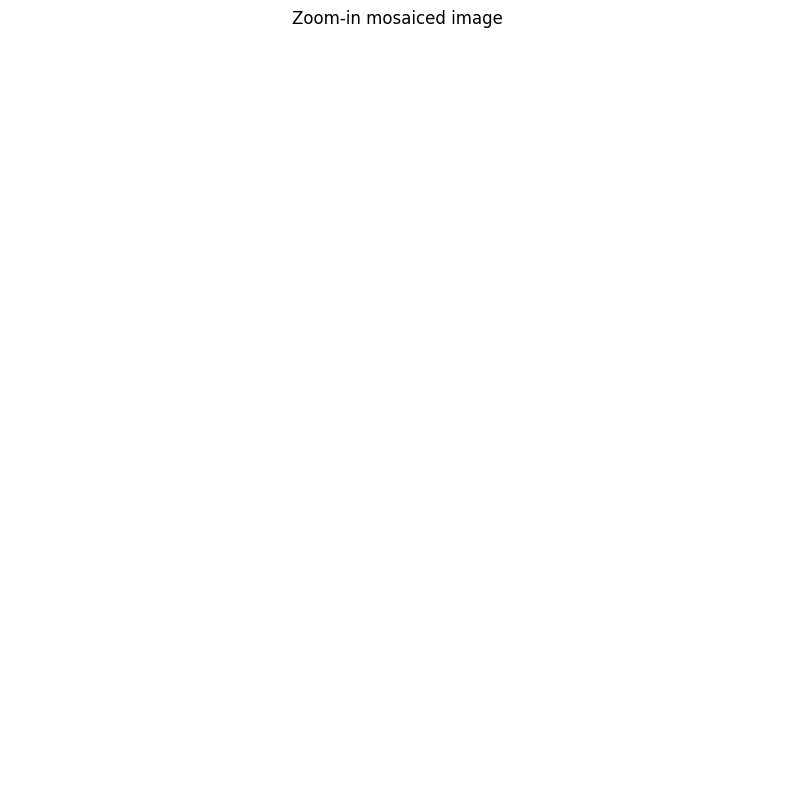

In [25]:
plt.figure(figsize=[10, 10])
plt.axis("off")
plt.title("Zoom-in mosaiced image")
plt.imshow(separate_chanel_rggb(mosaiced_image)[370:550, 300:480])

# Bilinear

NameError: name 'mosaiced_image' is not defined

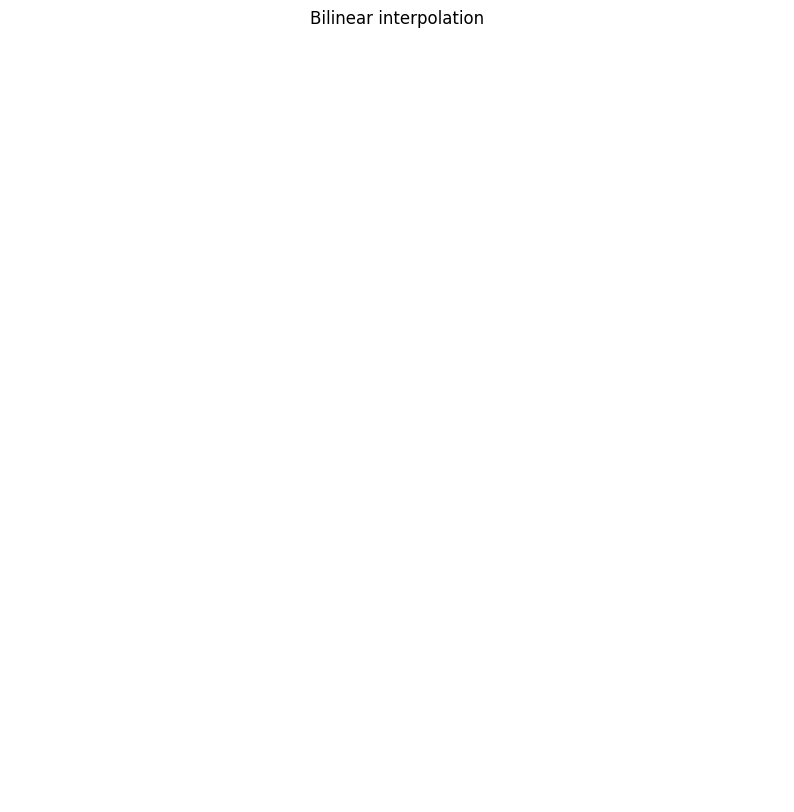

In [26]:
plt.figure(figsize=[10, 10])
plt.axis("off")
plt.title("Bilinear interpolation")
plt.imshow(demosaicing_CFA_Bayer_bilinear(mosaiced_image)[370:550, 300:480])

# Malvar (2004)

NameError: name 'mosaiced_image' is not defined

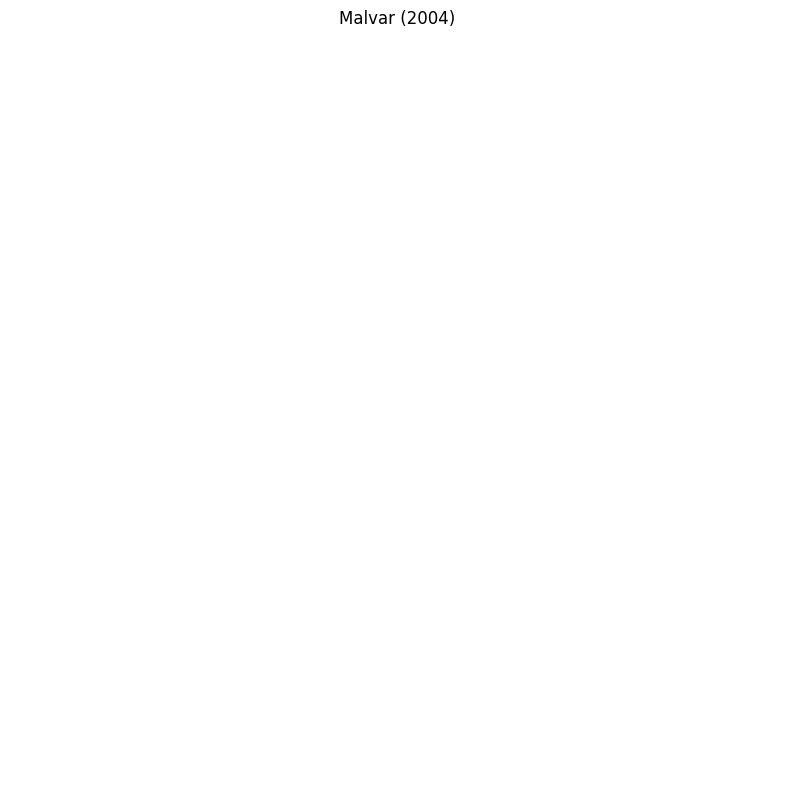

In [27]:
plt.figure(figsize=[10, 10])
plt.axis("off")
plt.title("Malvar (2004)")
plt.imshow(demosaicing_CFA_Bayer_Malvar2004(mosaiced_image)[370:550, 300:480])

# Menon (2007)

NameError: name 'mosaiced_image' is not defined

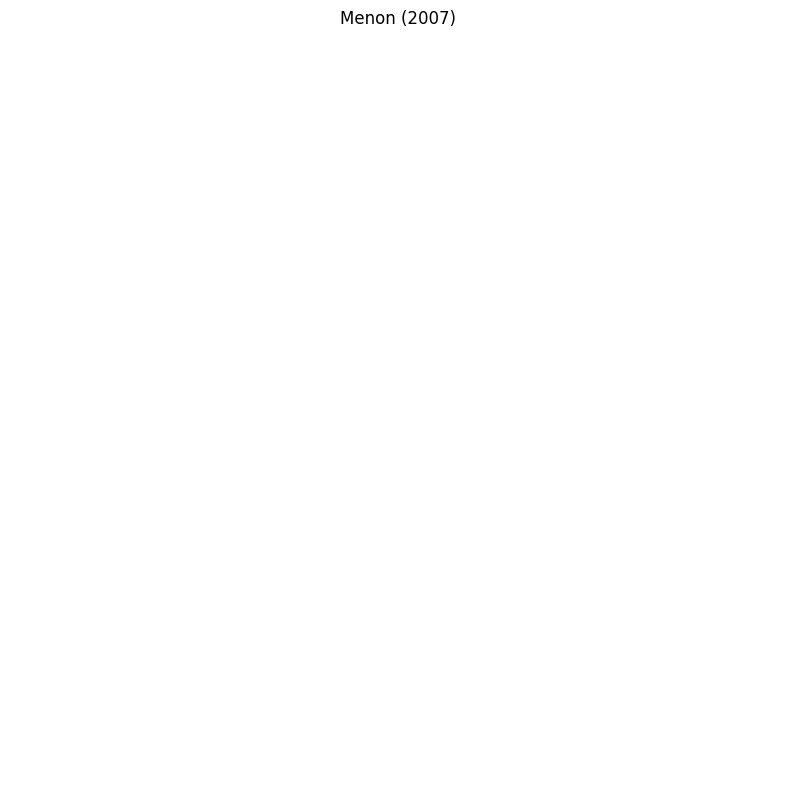

In [28]:
plt.figure(figsize=[10, 10])
plt.axis("off")
plt.title("Menon (2007)")
plt.imshow(demosaicing_CFA_Bayer_Menon2007(mosaiced_image)[370:550, 300:480])

# Домашнее задание

Вы часто будете сталкиваться с изображениями в RAW-формате при работе с индустриальными камерами и датасетами в области робототехники и беспилотного транспорта.

Например, датасет Oxford RobotCar содержит изображения в формате Bayer GBRG 8-bit (для камеры stereo).

In [29]:
OXFORD_SAMPLE_1_PATH = "data/oxford_robotcar_sample_1.png"
OXFORD_SAMPLE_2_PATH = "data/oxford_robotcar_sample_2.png"

if not Path(OXFORD_SAMPLE_1_PATH).exists():
    !git clone https://github.com/alexmelekhin/cv_course_2023.git
    !mv cv_course_2023/seminars/seminar_02/data .

In [30]:
oxford_img_1 = cv2.imread(OXFORD_SAMPLE_1_PATH, cv2.IMREAD_UNCHANGED)
oxford_img_2 = cv2.imread(OXFORD_SAMPLE_2_PATH, cv2.IMREAD_UNCHANGED)

oxford_img_1.shape, oxford_img_1.dtype

((960, 1280), dtype('uint8'))

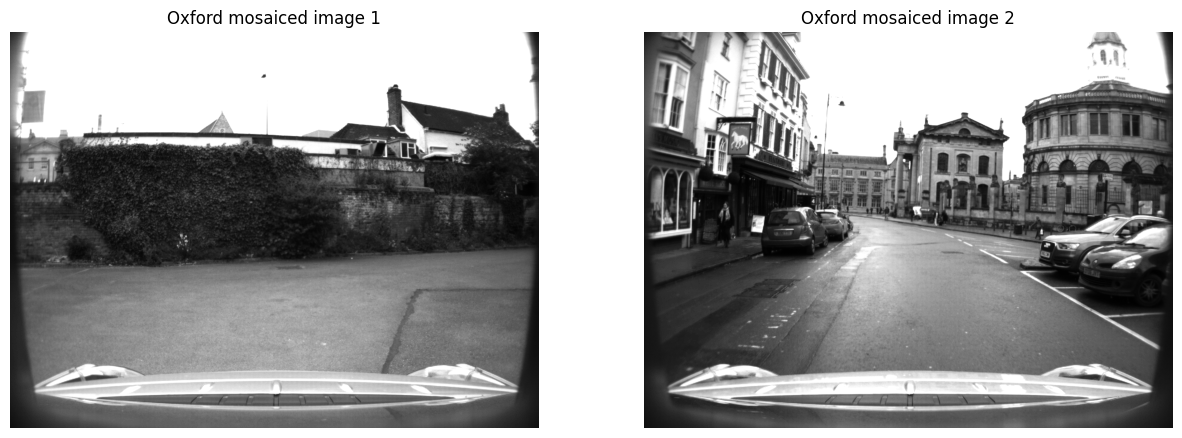

In [31]:
plt.figure(figsize=[15, 10])
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Oxford mosaiced image 1")
plt.imshow(oxford_img_1, cmap="gray")
plt.subplot(1, 2, 2)
plt.axis("off")
plt.title("Oxford mosaiced image 2")
plt.imshow(oxford_img_2, cmap="gray")

## Задание

Попробуйте разные алгоритмы демозаикинга на изображениях из RobotCar. Найдите участки с артефактами и сравните их между собой.

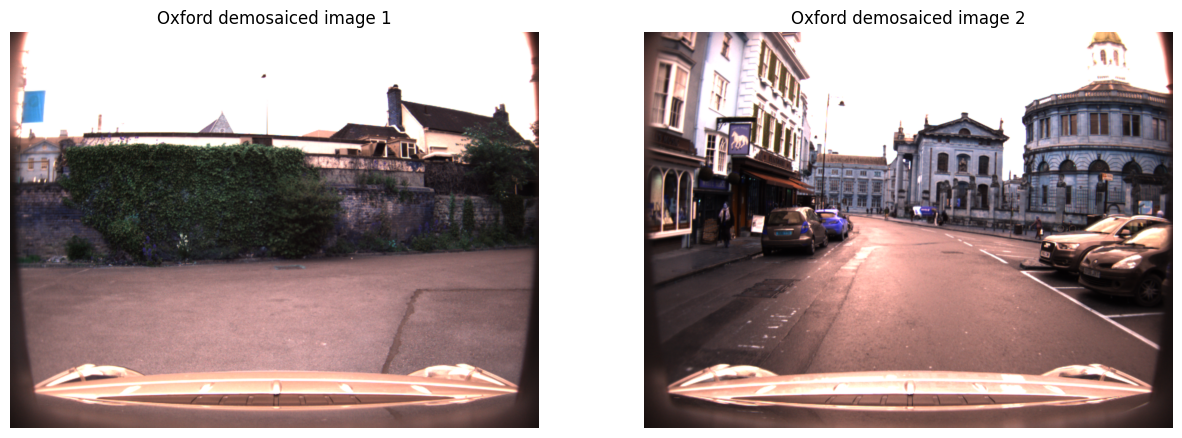

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

OXFORD_SAMPLE_1_PATH = "data/oxford_robotcar_sample_1.png"
OXFORD_SAMPLE_2_PATH = "data/oxford_robotcar_sample_2.png"

if not Path(OXFORD_SAMPLE_1_PATH).exists():
    !git clone https://github.com/alexmelekhin/cv_course_2023.git
    !mv cv_course_2023/seminars/seminar_02/data .

# Загрузка изображений
oxford_img_1 = cv2.imread(OXFORD_SAMPLE_1_PATH, cv2.IMREAD_UNCHANGED)
oxford_img_2 = cv2.imread(OXFORD_SAMPLE_2_PATH, cv2.IMREAD_UNCHANGED)

# Алгоритмы демозаикинга
def demosaic(img):
    return cv2.cvtColor(img, cv2.COLOR_BayerGB2RGB)  # меняем формат из BayerGB в RGB

oxford_img_rgb_1 = demosaic(oxford_img_1)
oxford_img_rgb_2 = demosaic(oxford_img_2)

# Отображение результатов
plt.figure(figsize=[15, 10])
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Oxford demosaiced image 1")
plt.imshow(oxford_img_rgb_1)
plt.subplot(1, 2, 2)
plt.axis("off")
plt.title("Oxford demosaiced image 2")
plt.imshow(oxford_img_rgb_2)
